In [82]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import zconfint as zconfint

In [2]:
df_house = pd.read_csv("datasets/house_prices.csv")

In [6]:
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


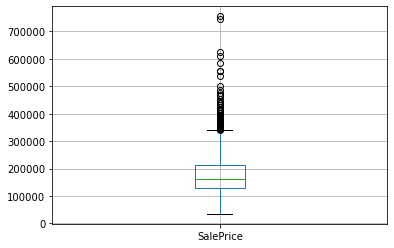

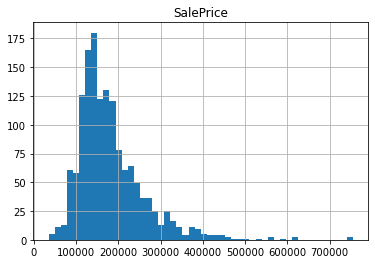

In [24]:
import matplotlib

df_house[["SalePrice"]].boxplot();
df_house[["SalePrice"]].hist(bins=50);

HIPÓTESIS: ¿Es el precio medio de venta de una casa en la zona estudiada mayor de $180k?

HACER: intervalos de confianza, pvalue del test y región de rechazo

El 10% de las casas vendidas son nuevas (Extra)

● Parámetro: proporción.

● Busca por internet y/o pregúntame si te atascas.

● Contrasta esta hipótesis a través de la técnica que prefieras.

Ho = 180000

n = 1460

media poblacional μ = 180921.19589041095

α = 0.1

In [133]:
#POBLACION:
μ = 180000 #media de la poblacion para este caso
H0 = μ

#MUESTRA
n = 1460
media_muest = df_house["SalePrice"].mean() # "x con sombrero encima"
std = df_house["SalePrice"].std()

α = 0.1
reg_acept = 1-α/2 #pq es unilateral (sino seria 1 - alfa)
np.sqrt(1460)
raiz_cuad_n = pow(n,1/2)

#z_dist_izq = scipy.stats.norm.ppf(α)
z_dist_critico_unilateral = scipy.stats.norm.ppf(1-α)

In [135]:
H0

180000

### region de rechazo y pevalue

In [124]:
z_manual = (media_muest-ho)/(std/raiz_cuad_n)
z_formula = ztest(x1=df_house["SalePrice"], value = ho, alternative="larger")

In [125]:
z_manual

0.443073219904593

In [126]:
z_formula

(0.44307321990459303, 0.3288563873974769)

In [127]:
z_dist_critico_unilateral

1.2815515655446004

In [128]:
"""REGIÓN DE ACEPTACIÓN DE Z para este test unilateral es rechazar lo que está a la derecha de 1.281. En nuestro caso Z = 0,44307 está a la izquierda por lo que no rechazamos nuestra hipótesis"""

'REGIÓN DE ACEPTACIÓN DE Z para este test unilateral es rechazar lo que está a la derecha de 1.281. En nuestro caso Z = 0,44307 está a la izquierda por lo que no rechazamos nuestra hipótesis'

In [137]:
"""P value es 0,32885. Si es menor al nivel de significancia (alfa = 0,1) rechazamos la hipótesis. Como es mayor NO RECHAZMOS"""

'P value es 0,32885. Si es menor al nivel de significancia (alfa = 0,1) rechazamos la hipótesis. Como es mayor NO RECHAZMOS'

### intervalo de confianza

In [130]:
z_dist_critico_bilateral = scipy.stats.norm.ppf(1-0.05)
z_dist_critico_bilateral

1.6448536269514722

In [131]:
IC = (media_muest-(z_dist_critico_bilateral*std/raiz_cuad_n) , media_muest+(z_dist_critico_bilateral*std/raiz_cuad_n))

In [132]:
IC

(177501.37195746932, 184341.01982335257)

In [119]:
IC2=zconfint(x1=df_house["SalePrice"], alpha=0.1)

In [120]:
IC2

(177501.37195746932, 184341.01982335257)